<a href="https://colab.research.google.com/github/kmswin1/Pytorch-Study/blob/master/Week4_VAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import sys
import timeit
import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import scipy as sp
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

#plt.rc('text', usetex = True)
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.size"] = "15"

print('python version : ', sys.version)
print('numpy version : ', np.version.version)
print('scipy version : ', sp.__version__)
print('matplotlib version :', mpl.__version__)
print('pytorch version : ', torch.__version__)
print('Cuda : ', torch.cuda.is_available())

python version :  3.6.7 (default, Oct 22 2018, 11:32:17) 
[GCC 8.2.0]
numpy version :  1.14.6
scipy version :  1.1.0
matplotlib version : 3.0.2
pytorch version :  1.0.0
Cuda :  True


In [0]:
batchSize = 256
learningRate = 0.005
epochNum = 80
inputDim = 28 * 28
hiddenDim = 400
latentDim = 50
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [0]:
dataTrain = torchvision.datasets.MNIST(root = './data',
                                         train = True,
                                         download = True,
                                         transform = transforms.ToTensor())

dataTest = torchvision.datasets.MNIST(root = './data',
                                         train = False,
                                         download = True,
                                         transform = transforms.ToTensor())

trainLoader = torch.utils.data.DataLoader(dataset = dataTrain, 
                                         batch_size = batchSize, 
                                         shuffle = True)

testLoader = torch.utils.data.DataLoader(dataset = dataTest, 
                                         batch_size = batchSize, 
                                         shuffle = False)

classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')

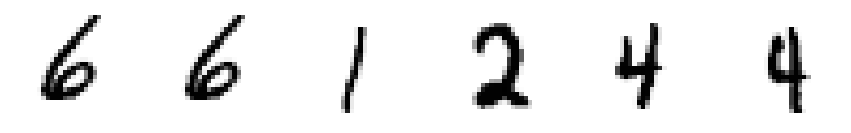

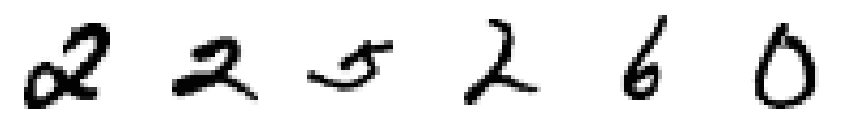

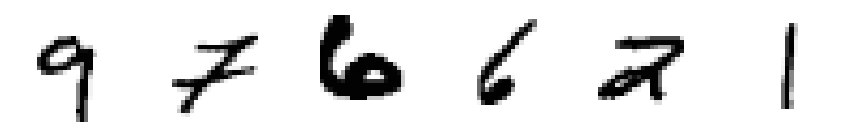

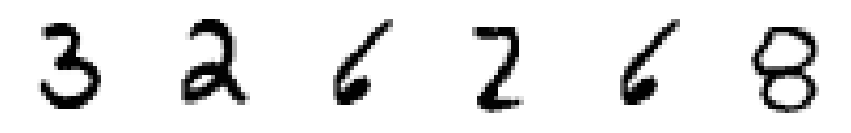

In [0]:
# 학습 데이터 출력을 위한 함수입니다.
def show_images(image, n_row):
  
  for _ in range(n_row):  
  
    index=np.random.choice(100, 6) # 0 ~ 99의 정수 중  6개 랜덤 샘플링
    images =image.numpy()[index] # 랜덤 샘플링 된 index에 해당하는 이미지 변수 저장
    
    plt.figure(figsize=(15,90)) # 세로 사이즈 15, 가로 사이즈 15*6
    
    for a in range(161, 167):    
    
      plt.subplot(a)
      plt.imshow(images[a-161])
      plt.xticks([])
      plt.yticks([])    
    
    plt.show()  

def test_and_show(D, fixed_z):
  
  D.eval()
  fake_images = D(fixed_z).view(-1, 28, 28) # 다시 이미지로 원상 복구시키기
  images_to_show = fake_images.data.cpu().squeeze().numpy() # numpy로 전환 (pyplot 연동을 위한)
  
  plt.figure(figsize=(10,60)) # 세로 사이즈: 10, 가로 사이즈: 10*6
  for a in range(161, 167):
    plt.subplot(a)
    plt.imshow(images_to_show[a-161])
    plt.xticks([]) # x tick 제거
    plt.yticks([]) # y tick 제거
  plt.show()

# 학습 데이터가 어떻게 생겼는지 출력해 볼 수 있습니다.
for i, (image,_) in enumerate(trainLoader): 
  
  show_images(image.squeeze(), 4)
  break

In [0]:
class Encoder(nn.Module):
    
    def __init__(self, inputDim, hiddenDim, outputDim):

        super(Encoder, self).__init__()
    
        self.hiddenDim = hiddenDim
        self.outputDim = outputDim
        self.fc1 = nn.Linear(inputDim, hiddenDim)
        self.latent = nn.Linear(hiddenDim, outputDim * 2) # mu and sigma
        self.relu = nn.ReLU(inplace = True)
    
    def forward(self, x):
    
        out = x
        out = self.fc1(out)
        out = self.relu(out)
        out = self.latent(out)

        return out

class Decoder(nn.Module):
    
    def __init__(self, latentDim, hiddenDim, outputDim):
    
        super(Decoder, self).__init__()

        self.hiddenDim = hiddenDim
        self.outputDim = outputDim
        self.fc1 = nn.Linear(latentDim, hiddenDim)
        self.fc2 = nn.Linear(hiddenDim, outputDim)
        self.relu = nn.ReLU(inplace = True)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
    
        out = x
        out = self.fc1(out)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.sigmoid(out)
    
        return out

encoder = Encoder(inputDim, hiddenDim, latentDim).to(device)
decoder = Decoder(latentDim, hiddenDim, inputDim).to(device)

/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Epoch [1/80], Step [200/235] Loss: 41289.0938


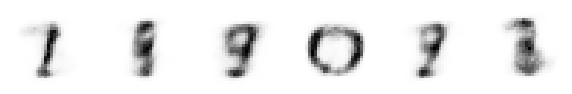

Epoch [2/80], Step [200/235] Loss: 35147.1758


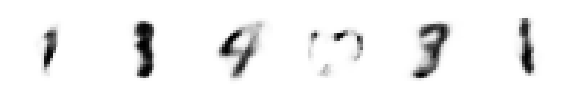

Epoch [3/80], Step [200/235] Loss: 34068.7422


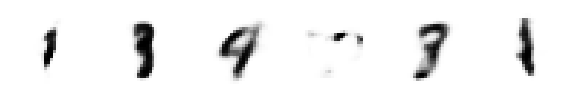

Epoch [4/80], Step [200/235] Loss: 34189.5234


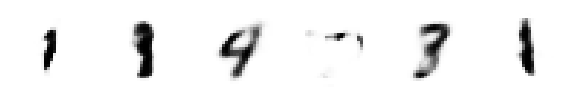

Epoch [5/80], Step [200/235] Loss: 34126.0898


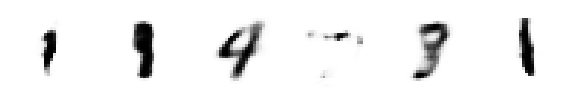

Epoch [6/80], Step [200/235] Loss: 34107.7344


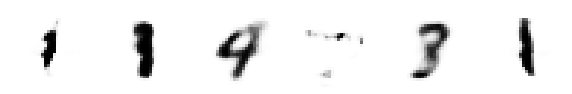

Epoch [7/80], Step [200/235] Loss: 33258.5508


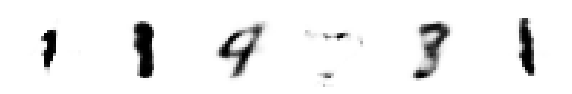

Epoch [8/80], Step [200/235] Loss: 33233.0391


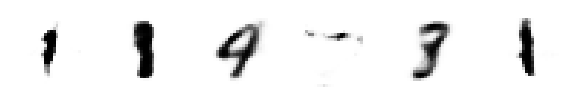

Epoch [9/80], Step [200/235] Loss: 33016.5781


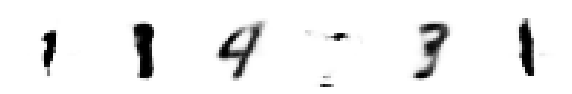

Epoch [10/80], Step [200/235] Loss: 32235.6699


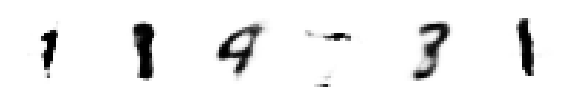

Epoch [11/80], Step [200/235] Loss: 31997.2637


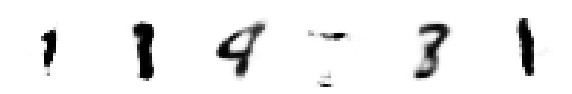

Epoch [12/80], Step [200/235] Loss: 32319.2656


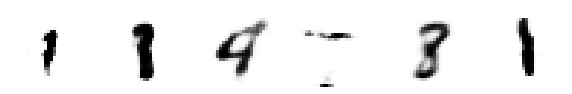

Epoch [13/80], Step [200/235] Loss: 32206.3047


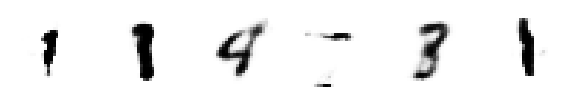

Epoch [14/80], Step [200/235] Loss: 30943.4805


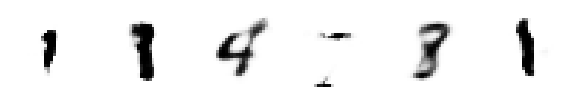

Epoch [15/80], Step [200/235] Loss: 32520.4199


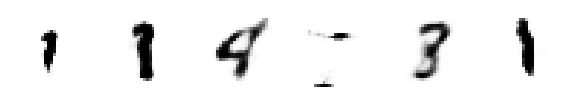

Epoch [16/80], Step [200/235] Loss: 31864.8340


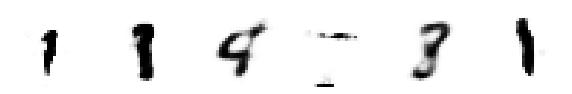

Epoch [17/80], Step [200/235] Loss: 31789.9844


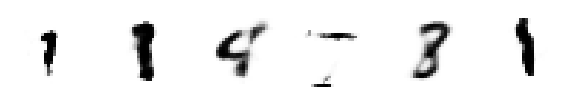

Epoch [18/80], Step [200/235] Loss: 32565.3281


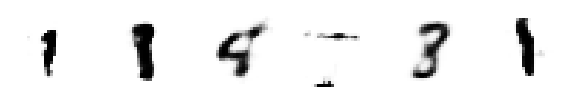

Epoch [19/80], Step [200/235] Loss: 32274.9512


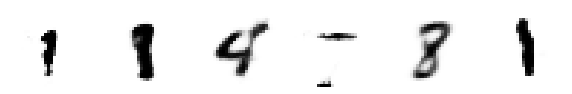

Epoch [20/80], Step [200/235] Loss: 32107.3867


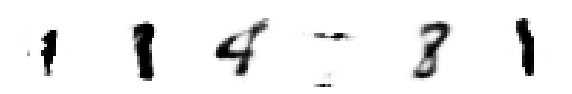

Epoch [21/80], Step [200/235] Loss: 31975.6387


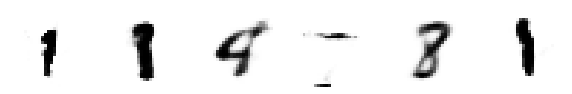

Epoch [22/80], Step [200/235] Loss: 32341.4863


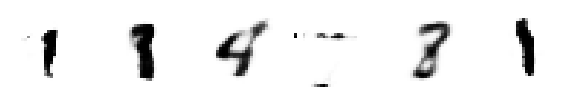

Epoch [23/80], Step [200/235] Loss: 32077.6016


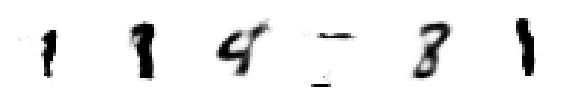

Epoch [24/80], Step [200/235] Loss: 31439.0996


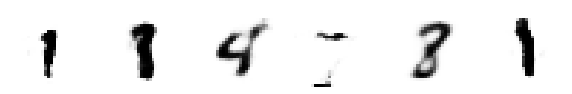

Epoch [25/80], Step [200/235] Loss: 31870.2363


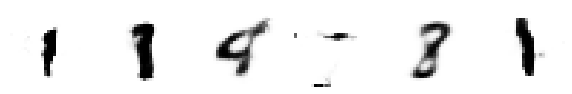

Epoch [26/80], Step [200/235] Loss: 31239.1035


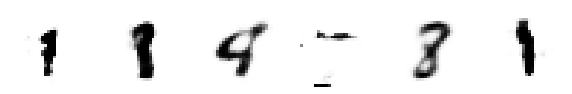

Epoch [27/80], Step [200/235] Loss: 31147.2500


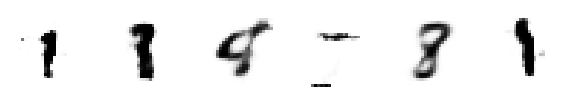

Epoch [28/80], Step [200/235] Loss: 32835.2031


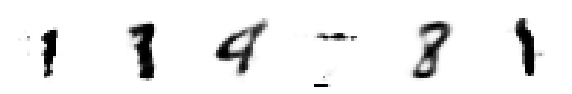

Epoch [29/80], Step [200/235] Loss: 30527.5762


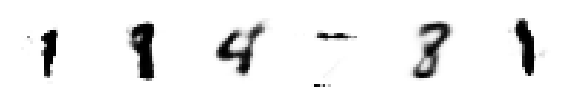

Epoch [30/80], Step [200/235] Loss: 31370.7715


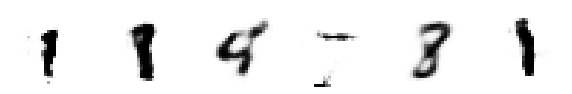

Epoch [31/80], Step [200/235] Loss: 32153.0547


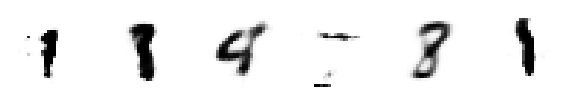

Epoch [32/80], Step [200/235] Loss: 30446.6680


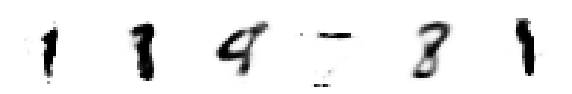

Epoch [33/80], Step [200/235] Loss: 31253.0820


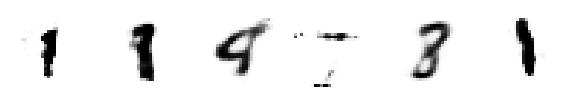

Epoch [34/80], Step [200/235] Loss: 32110.2637


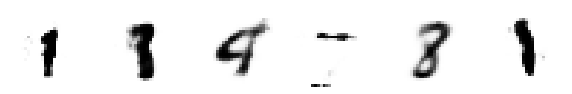

Epoch [35/80], Step [200/235] Loss: 30207.4023


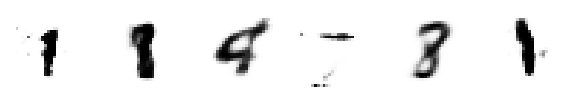

Epoch [36/80], Step [200/235] Loss: 31314.9160


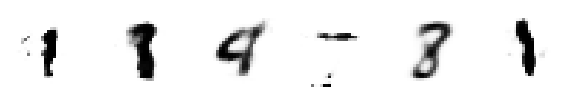

Epoch [37/80], Step [200/235] Loss: 32222.5801


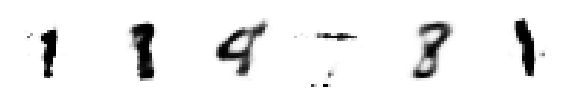

Epoch [38/80], Step [200/235] Loss: 32737.9180


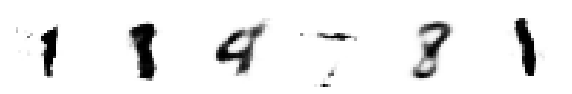

Epoch [39/80], Step [200/235] Loss: 31692.1094


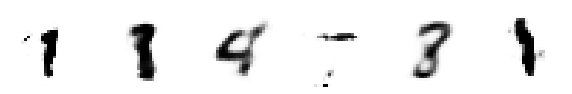

Epoch [40/80], Step [200/235] Loss: 32077.4258


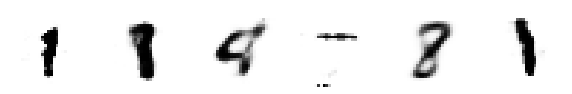

Epoch [41/80], Step [200/235] Loss: 31140.8203


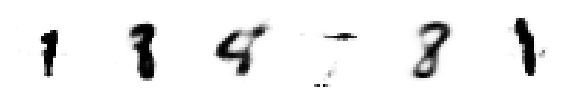

Epoch [42/80], Step [200/235] Loss: 33065.9883


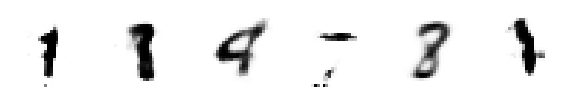

Epoch [43/80], Step [200/235] Loss: 33081.7383


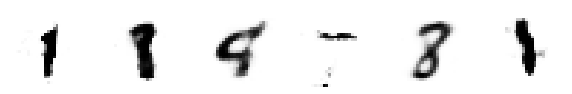

Epoch [44/80], Step [200/235] Loss: 31706.5156


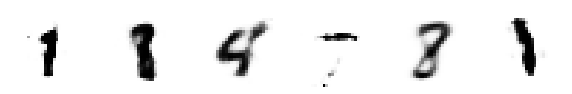

Epoch [45/80], Step [200/235] Loss: 31917.6035


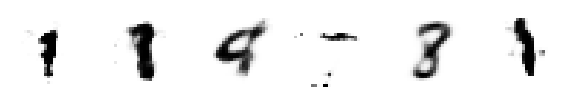

Epoch [46/80], Step [200/235] Loss: 32161.3320


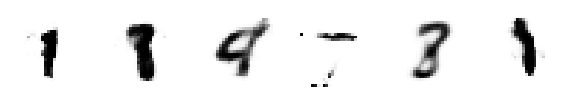

Epoch [47/80], Step [200/235] Loss: 31513.4512


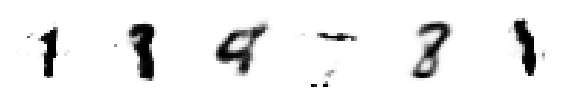

Epoch [48/80], Step [200/235] Loss: 31529.9531


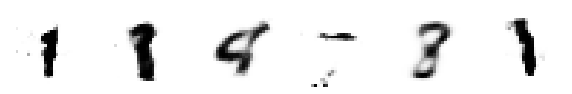

Epoch [49/80], Step [200/235] Loss: 32989.9531


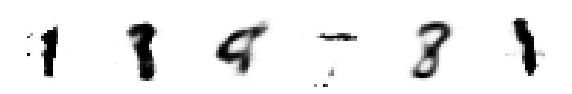

Epoch [50/80], Step [200/235] Loss: 32302.2930


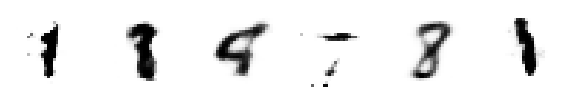

Epoch [51/80], Step [200/235] Loss: 30900.4961


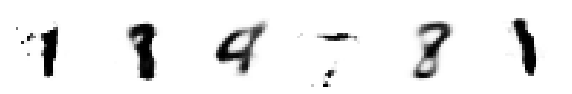

Epoch [52/80], Step [200/235] Loss: 31170.6660


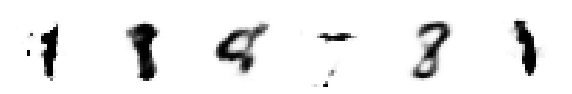

Epoch [53/80], Step [200/235] Loss: 31395.5391


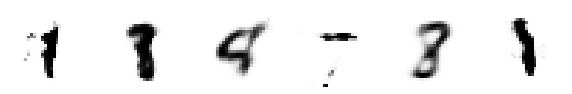

Epoch [54/80], Step [200/235] Loss: 31719.9512


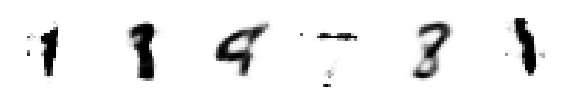

Epoch [55/80], Step [200/235] Loss: 32650.9883


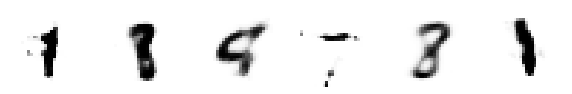

Epoch [56/80], Step [200/235] Loss: 32030.7773


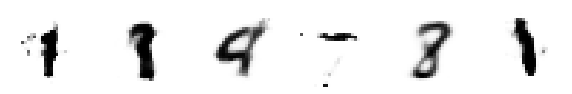

Epoch [57/80], Step [200/235] Loss: 33190.3125


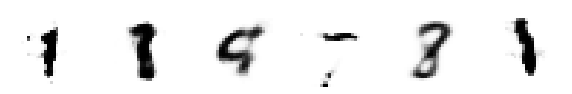

Epoch [58/80], Step [200/235] Loss: 32216.8887


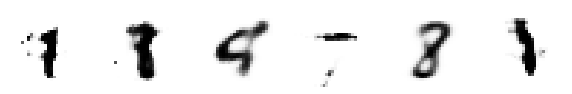

Epoch [59/80], Step [200/235] Loss: 32789.8047


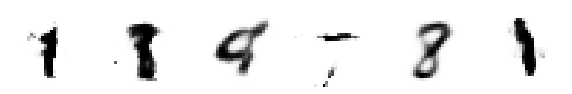

Epoch [60/80], Step [200/235] Loss: 30397.2832


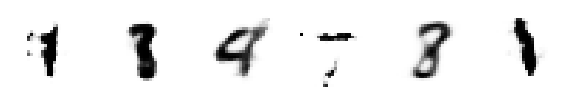

Epoch [61/80], Step [200/235] Loss: 32005.9355


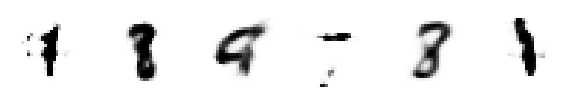

Epoch [62/80], Step [200/235] Loss: 32534.2637


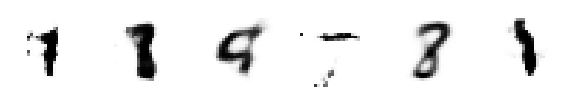

Epoch [63/80], Step [200/235] Loss: 31389.8281


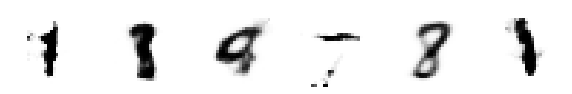

Epoch [64/80], Step [200/235] Loss: 31847.4180


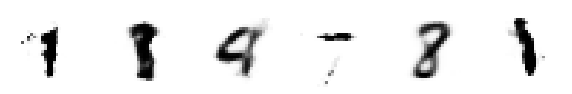

Epoch [65/80], Step [200/235] Loss: 32934.5156


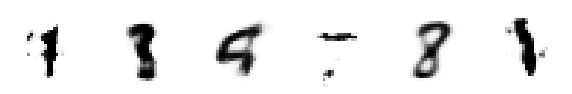

Epoch [66/80], Step [200/235] Loss: 31197.8809


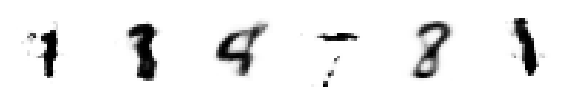

Epoch [67/80], Step [200/235] Loss: 31288.6426


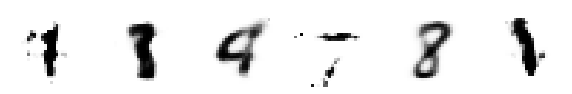

Epoch [68/80], Step [200/235] Loss: 31397.4355


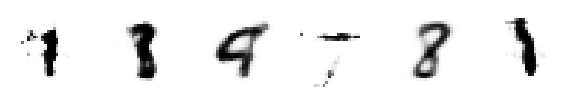

Epoch [69/80], Step [200/235] Loss: 33015.5859


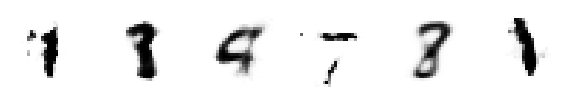

Epoch [70/80], Step [200/235] Loss: 31328.4922


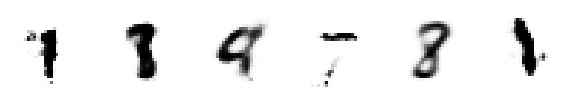

Epoch [71/80], Step [200/235] Loss: 32458.4141


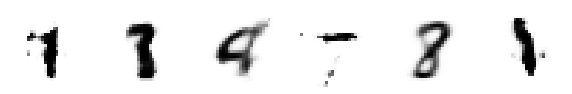

Epoch [72/80], Step [200/235] Loss: 32465.8301


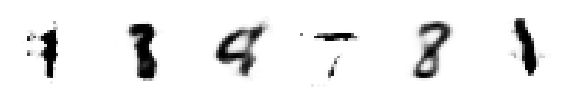

Epoch [73/80], Step [200/235] Loss: 32327.4922


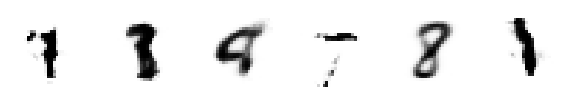

Epoch [74/80], Step [200/235] Loss: 31150.9297


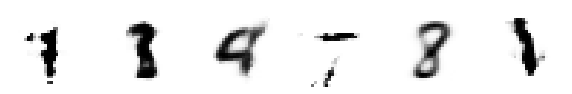

Epoch [75/80], Step [200/235] Loss: 31340.8965


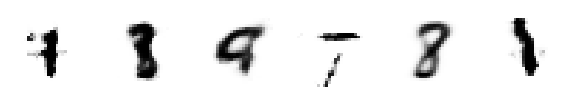

Epoch [76/80], Step [200/235] Loss: 32157.2480


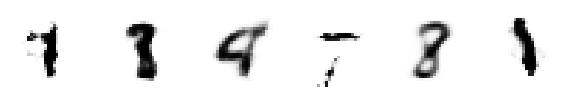

Epoch [77/80], Step [200/235] Loss: 31821.8418


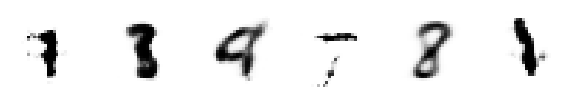

Epoch [78/80], Step [200/235] Loss: 32813.2461


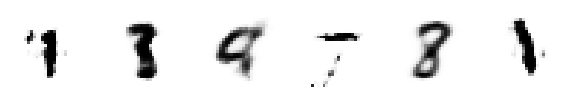

Epoch [79/80], Step [200/235] Loss: 32049.6152


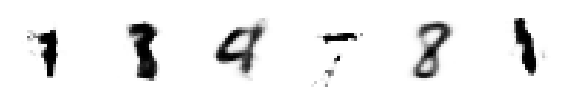

Epoch [80/80], Step [200/235] Loss: 32826.6445


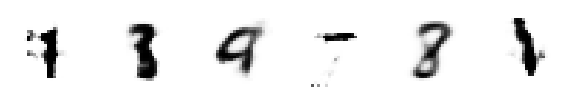

In [0]:
BCE = nn.BCELoss(size_average = False)

def criterion(reconstruct, x, mu, logvar):
    
    bce = BCE(reconstruct, x)
    kld = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    
    return bce + kld

def reparametize(mu, logvar):
    
    std = torch.exp(0.5 * logvar)
    eps = torch.randn_like(std)
    
    return eps.mul(std).add_(mu)

optimizer = torch.optim.Adam(list(encoder.parameters()) + list(decoder.parameters()), lr = learningRate)
totalStep = len(trainLoader)

fixedLatent = torch.randn(batchSize, latentDim).to(device)

for epoch in range(epochNum):
    
    try:
        
        for idx, (images, labels) in enumerate(trainLoader):
            
            encoder.train()
            decoder.train()
            
            real = images.view(batchSize, -1).to(device)
            latent = encoder(real)
            mu, logvar = torch.split(latent, latentDim, dim = 1)
            
            z = reparametize(mu, logvar)
            fake = decoder(z)
            loss = criterion(fake, real, mu, logvar)
            
            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            if (idx + 1) % 200 == 0:
                
                print("Epoch [{}/{}], Step [{}/{}] Loss: {:.4f}".format(epoch + 1, epochNum, idx + 1, totalStep, loss.item()))
                test_and_show(decoder, fixedLatent)
            
    except:
        
        continue